## Univariate Linear Regression

In [143]:
#House Price Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Data Loading and Preparation

#Takes house size as one input and gives out price
f(x) = wx + b (Linear Regression with one variable)
Univariate linear regression

In [144]:
data = pd.read_csv('USA_Housing.csv')


In [145]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [146]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Goal:-

## Price Prediction using Avg.Area income(Simple Linear Regression)

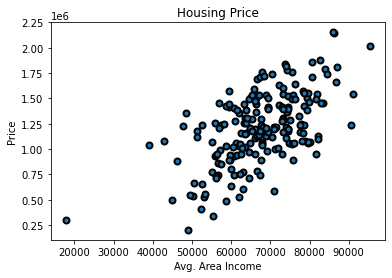

In [148]:
#Feature
X = data['Avg. Area Income'].values
y = data['Price'].values

#plotting the data
plt.scatter(X[0:200],y[0:200],edgecolor='black',linewidth=2,alpha=1.00)
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.title('Housing Price')
plt.show()


In [149]:
#Number of training examples
m = len(y)
X=X.reshape(m,-1)#column vector

In [150]:
X.shape

(5000, 1)

In [151]:
#feature scaling
#mean normalisation
X_mean = np.mean(X)
X_std = np.std(X)
X_scaled = (X-X_mean)/X_std
            

In [152]:
X_Scaled[0:10]

array([[ 1.02865969],
       [ 1.00080775],
       [-0.68462916],
       [-0.49149907],
       [-0.80707253],
       [ 1.08780392],
       [-0.36451842],
       [ 0.92064362],
       [-0.81219   ],
       [ 1.24827919]])

In [153]:
#DESIGN MATRIX
X_b = np.c_[np.ones((m,1)),X_scaled]

In [174]:
X_b[0:10]


array([[ 1.        ,  1.02865969],
       [ 1.        ,  1.00080775],
       [ 1.        , -0.68462916],
       [ 1.        , -0.49149907],
       [ 1.        , -0.80707253],
       [ 1.        ,  1.08780392],
       [ 1.        , -0.36451842],
       [ 1.        ,  0.92064362],
       [ 1.        , -0.81219   ],
       [ 1.        ,  1.24827919]])

## Cost Function

### Mean Squared Error

#### j(theta)= (1/2m)*sum((h(X)-y)^2) 

##### Now h(X) = X.theta or X.dot(theta)
where h is our hypotheis and theta is our parameters or weights

In [155]:
def cost_function(X,y,theta):
    m = len(y)
    pred = X.dot(theta)
    error = pred-y
    sqr_errors= np.square(error)
    cost = (1/(2*m))*np.sum(sqr_errors)
    return cost
    

## Gradient descent

### gradient(j(theta))

### update theta = theta - learningrate*partial_derivative(j(theta))

In [156]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        pred = X.dot(theta)
        error = pred-y
        gradient = (1/m)*np.matmul(X.T,error)
        theta = theta - (alpha*gradient)# alpha is the learning rate
        cost = cost_function(X,y,theta)
        cost_history.append(cost)
        
    return theta , cost_history
    

## Building and Training the model

In [157]:
#first we initialise theta with zeros
theta_initial = np.zeros(2)
theta_initial

array([0., 0.])

In [158]:
alpha=0.015
iterations=5000
print('Starting gardient descent')

Starting gardient descent


In [159]:
theta_final , cost_history = gradient_descent(X_b,y,theta_initial,alpha,iterations)

In [160]:
print("Gradient Descent Finished.")
print(f"\nFinal learned parameters (theta):")
print(f"  - theta_0 (Intercept): {theta_final[0]:.2f}")
print(f"  - theta_1 (Slope):     {theta_final[1]:.2f}")

Gradient Descent Finished.

Final learned parameters (theta):
  - theta_0 (Intercept): 1232072.65
  - theta_1 (Slope):     225878.68


In [161]:
theta_final

array([1232072.65414235,  225878.68216238])

In [162]:
final_cost = cost_function(X_b,y,theta_final)
print(f"\nFinal Cost (MSE): {final_cost:.2f}")


Final Cost (MSE): 36822970367.59


## Visualization

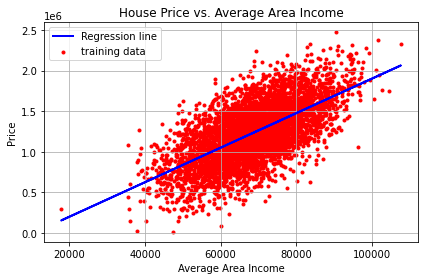

In [163]:

plt.scatter(X,y,color='red',marker='.',label='training data')#original data
predictions = X_b.dot(theta_final)
plt.plot(X,predictions,color='b',linewidth=2,label='Regression line')#predicted data 
plt.title('House Price vs. Average Area Income')
plt.xlabel('Average Area Income')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Making a new prediction

In [164]:
new = 75000
#scale it 
new_s = (new-X_mean)/X_std
new_data_point = np.array([1,new_s])

In [165]:
new_data_point

array([1.        , 0.60213343])

In [166]:
predicted_price = new_data_point.dot(theta_final)

### this is to find the closest index that corresponds to new income

In [169]:
closest_index = np.argmin(np.abs(X-new))
print(X[closest_index])
actual_price = y[closest_index]

[74994.85564398]


In [170]:
print(f"Predicted price: ${predicted_price:,.2f}")
print(f"Actual price for that house: ${actual_price:,.2f}")

Predicted price: $1,368,081.76
Actual price for that house: $1,301,486.69
